In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Exercice 1

## question 1

In [151]:
def f(t):
    return np.pow(t,-1/2)

def Im(f,t,h):
    I = 0
    for i in range(1, len(t)-1):
        I += 3*h/4 * f(t[i-1] + h/3) + h/4 * f(t[i-1] + h)
    return I

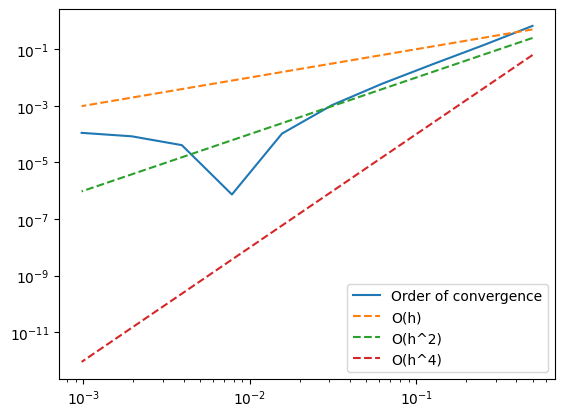

In [183]:
a,b = 1,2
K = np.arange(1, 11)
h_list = (b-a)/2**K
I = [Im(f, np.linspace(a, b, k+1), (b-a)/k) for k in K]


errors = []

def calculate_errors(sol_exact, sol_appr):
    return np.max(
        np.power(np.abs(sol_appr - sol_exact), 2)[np.isfinite(np.power(np.abs(sol_appr - sol_exact), 2))]
    )

for h in h_list:
    t = np.arange(a, b, h)

    I = Im(f, t, h)
    I_exact = (b-a)*f((a+b)/2)

    errors.append(calculate_errors(I_exact, I))


plt.plot(h_list,errors, label="Order of convergence")
plt.plot(h_list,h_list, label="O(h)", linestyle='--')
plt.plot(h_list,h_list**2, label="O(h^2)", linestyle='--')
plt.plot(h_list,h_list**4, label="O(h^4)", linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

l'orde de cette approximation est 2

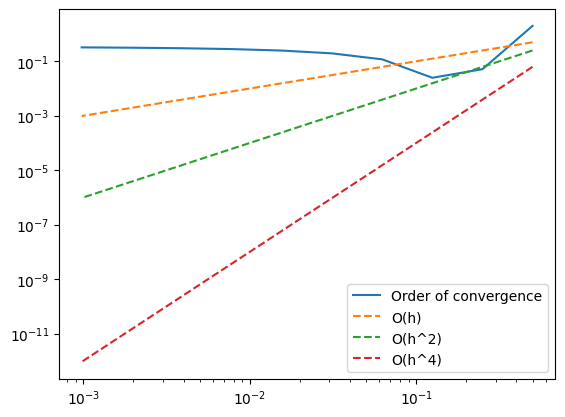

In [184]:
a,b = 0,1
K = np.arange(1, 11)
h_list = (b-a)/2**K
I = [Im(f, np.linspace(a, b, k+1), (b-a)/k) for k in K]


errors = []

def calculate_errors(sol_exact, sol_appr):
    return np.max(
        np.power(np.abs(sol_appr - sol_exact), 2)[np.isfinite(np.power(np.abs(sol_appr - sol_exact), 2))]
    )

for h in h_list:
    t = np.arange(a, b, h)

    I = Im(f, t, h)
    I_exact = (b-a)*f((a+b)/2)

    errors.append(calculate_errors(I_exact, I))

plt.plot(h_list,errors, label="Order of convergence")
plt.plot(h_list,h_list, label="O(h)", linestyle='--')
plt.plot(h_list,h_list**2, label="O(h^2)", linestyle='--')
plt.plot(h_list,h_list**4, label="O(h^4)", linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

l'orde de cette approximation est 1

## Question 2

In [228]:
import scipy.optimize as opt

In [233]:
def RKI(f, df, y0, vt, tol = 1e-6, itmax = 20):
    y = np.asarray(y0).ravel()
    for i in range(len(vt)-1):  
        p1 = f(vt[i],y[i])

        F1 = lambda p2 : p2 - f(vt[i] + h/3, y[i] + h/3*(p1 + p2))
        dF1 = lambda p2 : 1 - df(vt[i] + h/3, y[i] + h/3*(p1 + p2))
        p2 = opt.newton(F1, 0, fprime=dF1)

        F2 = lambda y_next: y_next - y[i] - h/4*(3*p2 + f(vt[i+1], y_next))
        dF2 = lambda y_next: 1 - h/4*df(vt[i+1], y_next)
        y_next = opt.newton(F2, y[i], fprime=dF2)

        y = np.append(y, y_next) 

    return y


## Question 3

In [234]:
def f_exact(t):
    return 1/np.sqrt(1+3*np.exp(t**2))

def f_rk(t,y):
    return t*y**3 - t*y

def df_rk(t,y):
    return 3*t*y**2 - t

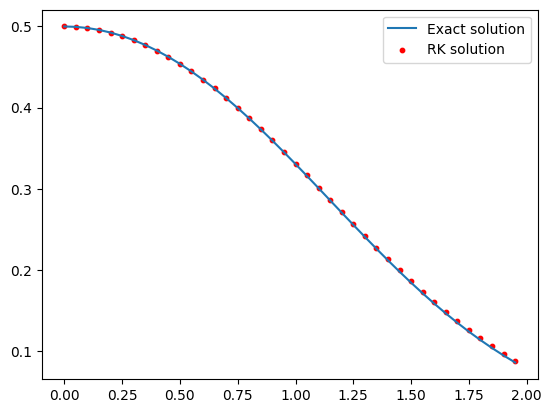

In [235]:
h = 0.05

vt = np.arange(0,2,h)
y0 = np.array([0.5])  

plt.plot(vt, f_exact(vt), label="Exact solution")
plt.scatter(vt, RKI(f_rk, df_rk, y0, vt), label="RK solution", color='red', s=10, marker='o')  
plt.legend()
plt.show()

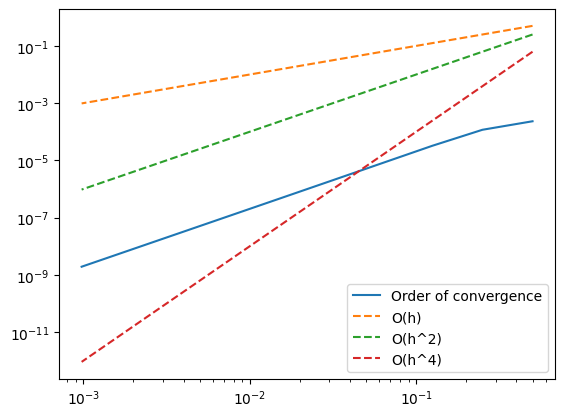

In [236]:
K = np.arange(1, 11)
h_list = 1/2**K
y0 = np.array([0.5])

errors = []

def calculate_errors(sol_exact, sol_appr):
    return np.max(
        np.power(np.abs(sol_appr - sol_exact), 2)[np.isfinite(np.power(np.abs(sol_appr - sol_exact), 2))]
    )

for h in h_list:
    vt = np.arange(0,2,h)  

    sol_RKI = RKI(f_rk, df_rk, y0, vt)
    sol_exact = f_exact(vt)
    errors.append(calculate_errors(sol_exact, sol_RKI))

plt.plot(h_list,errors, label="Order of convergence")
plt.plot(h_list,h_list, label="O(h)", linestyle='--')
plt.plot(h_list,h_list**2, label="O(h^2)", linestyle='--')
plt.plot(h_list,h_list**4, label="O(h^4)", linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Le schéma RKI est d'orde 2

In [264]:
def f(t,vect):
    x, y, z = vect
    x_prime = 1 + x**2 * y - (z + 1) * x
    y_prime = x*z - x**2 * y
    z_prime = -x*z + 1.45
    return np.array([x_prime, y_prime, z_prime])

def dfx(t,vect):
    x, y, z = vect
    x_prime = 2*x*y - z - 1
    y_prime = x
    z_prime = -x
    return np.array([x_prime, y_prime, z_prime])

def dfy(t,vect):
    x, y, z = vect
    x_prime = x**2
    y_prime = -x**2
    z_prime = 0
    return np.array([x_prime, y_prime, z_prime])

def dfz(t,vect):
    x, y, z = vect
    x_prime = -x
    y_prime = x
    z_prime = -x
    return np.array([x_prime, y_prime, z_prime])

def df(t,vect):
    return np.array([dfx(t,vect), dfy(t,vect), dfz(t,vect)])

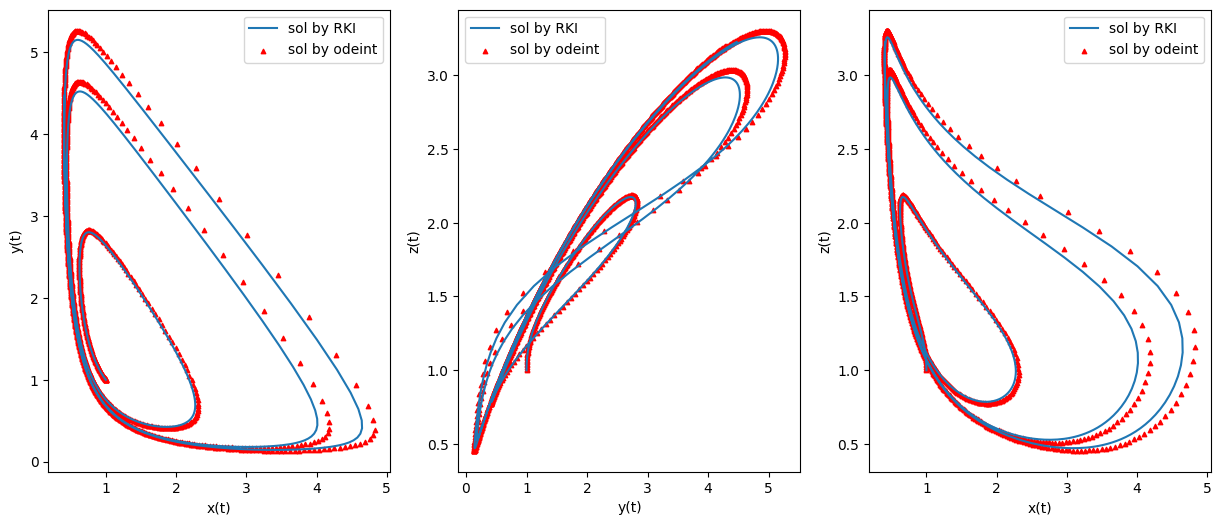

In [ ]:
def RKI_multi_dim(f, df, y0, vt):
    y = np.asarray(y0).reshape(1, -1)  

    for i in range(len(vt) - 1):
        p1 = f(vt[i], y[i])
        
        def F1(p2):
            return p2 - f(vt[i] + h / 3, y[i] + h / 3 * (p1 + p2))
        
        p2 = opt.newton(F1, np.zeros(len(y0)))
        
        def F2(y_next):
            return y_next - y[i] - h / 4 * (3 * p2 + f(vt[i + 1], y_next))
        
        y_next = opt.newton(F2, y[i].flatten())
        y = np.vstack((y, y_next))
    
    return y

h = 0.025
y0 = [1,1,1]
vt = np.arange(0,40,h)

sol_RKI = RKI_multi_dim(f, df, y0, vt)

from scipy.integrate import odeint
sol_exact = odeint(f, y0, vt, tfirst=True)

fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].plot(sol_RKI[:, 0], sol_RKI[:, 1], label="sol by RKI")
ax[0].scatter(sol_exact[:, 0], sol_exact[:, 1], label="sol by odeint", color='red', s=10, marker='^')
ax[0].set_xlabel("x(t)")
ax[0].set_ylabel("y(t)")
ax[0].legend()

ax[1].plot(sol_RKI[:, 1], sol_RKI[:, 2], label="sol by RKI")
ax[1].scatter(sol_exact[:, 1], sol_exact[:, 2], label="sol by odeint", color='red', s=10, marker='^')
ax[1].set_xlabel("y(t)")
ax[1].set_ylabel("z(t)")
ax[1].legend()

ax[2].plot(sol_RKI[:, 0], sol_RKI[:, 2], label="sol by RKI")   
ax[2].scatter(sol_exact[:, 0], sol_exact[:, 2], label="sol by odeint", color='red', s=10, marker='^')
ax[2].set_xlabel("x(t)")
ax[2].set_ylabel("z(t)")
ax[2].legend()


In [302]:
def R(z):
    return 1 + 3/4 * z * (1 + z/6)/(1 - z/6)

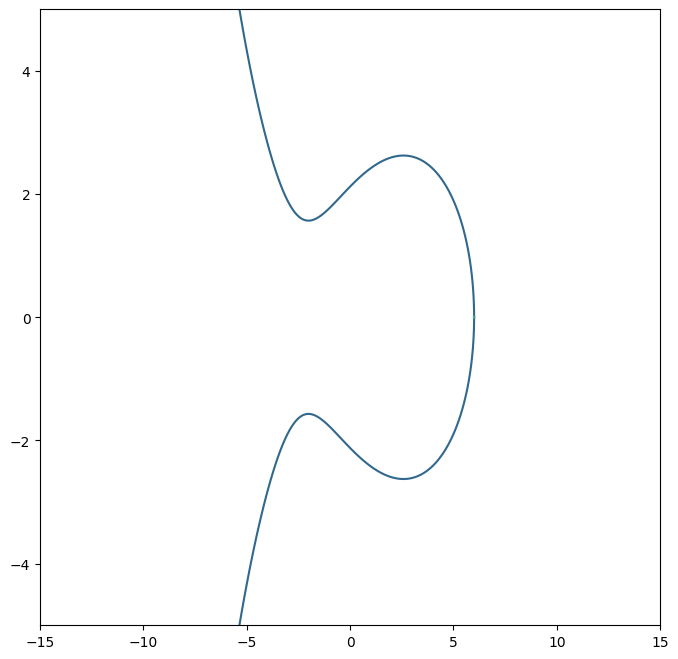

In [325]:
x = np.linspace(-15, 15, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = R(X + 1j*Y)
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, levels=1)
